In [1]:
pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 2.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import pandas as pd
from eclat import eclat
from pandas import DataFrame
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [4]:
def data_gen(filename):
 with open(filename) as file:
   splitted = [line.split(' ') for line in [line for line in file]]
   cleared = [list(filter(lambda x: x != '\n', split)) for split in splitted]
   return cleared

In [5]:
transactions_files = ['retail.txt', 'chess.txt', 'accidents.txt']

In [ ]:
dataset = data_gen('accidents.txt')
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = DataFrame(te_ary, columns=te.columns_)
df

,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,...,63,64,65,66,67,68,69,7,70,71,72,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99
0,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340178,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
340179,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
340180,True,False,False,False,Fa

In [ ]:
len(df)

340183

In [ ]:
itemsets = fpgrowth(df, min_support=0.5)
itemsets

,support,itemsets
0,0.999906,(78)
1,0.998289,(23)
2,0.996802,(89)
3,0.977162,(67)
4,0.934832,(234)
...,...,...
8052,0.509787,"(200, 89, 428)"
8053,0.510766,"(200, 428, 78, 23)"
8054,0.509720,"(200, 89, 428, 78)"
8055,0.509585,"(200, 89, 428, 23)"


In [ ]:
apriori(df, min_support=0.2)

,support,itemsets
0,0.574794,(9693)
1,0.477927,(10693)
2,0.330551,"(10693, 9693)"


In [ ]:
eclat(dataset, supp=20, out=[], zmin=1)

[(('48', '39'), 29142), (('48',), 42135), (('39',), 50675)]

In [ ]:
for min_sup in [0.01, 0.03, 0.05, 0.1, 0.15, 0.2]:
  apriori_items = apriori(df, min_sup)
  fpgrowth_items = fpgrowth(df, min_sup)
  eclat_items = eclat(dataset, supp=min_sup*100, zmin=1, out=[])
  print("For min_sup ", min_sup, ": ", "Apriori itemset size: ", len(apriori_items.index), "FPGrowth itemset size: ", len (fpgrowth_items.index), "ECLAT itemset size: ", len(eclat_items))


For min_sup  0.01 :  Apriori itemset size:  159 FPGrowth itemset size:  159 ECLAT itemset size:  159
For min_sup  0.03 :  Apriori itemset size:  32 FPGrowth itemset size:  32 ECLAT itemset size:  32
For min_sup  0.05 :  Apriori itemset size:  16 FPGrowth itemset size:  16 ECLAT itemset size:  16
For min_sup  0.1 :  Apriori itemset size:  9 FPGrowth itemset size:  9 ECLAT itemset size:  9
For min_sup  0.15 :  Apriori itemset size:  6 FPGrowth itemset size:  6 ECLAT itemset size:  6
For min_sup  0.2 :  Apriori itemset size:  3 FPGrowth itemset size:  3 ECLAT itemset size:  3


In [ ]:
dataset = data_gen('retail.txt')
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = DataFrame(te_ary, columns=te.columns_)

In [ ]:
supports = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2]
times_dict = {'apriori':[], 'fpgrowth':[], 'eclat':[]}

for min_sup in supports:
  start = time.time()
  apriori_items = apriori(df, min_sup)
  end = time.time()
  times_dict['apriori'].append(end-start)
  
  start = time.time()
  fpgrowth_items = fpgrowth(df, min_sup)
  end = time.time()
  times_dict['fpgrowth'].append(end-start)

  start = time.time()
  eclat_items = eclat(dataset, supp=min_sup*100, out=[])
  end = time.time()
  times_dict['eclat'].append(end-start)

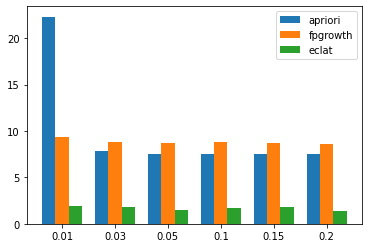

In [ ]:
fig, ax = plt.subplots()

x = np.arange(len(supports))

rects1 = ax.bar(x - 0.25, times_dict['apriori'], 0.25, label='apriori')
rects2 = ax.bar(x, times_dict['fpgrowth'], 0.25, label='fpgrowth')
rects3 = ax.bar(x + 0.25, times_dict['eclat'], 0.25, label='eclat')
ax.set_xticks(x)
ax.set_xticklabels(supports)
ax.legend()

# Зависимость количества частых наборов от значения поддержки

In [ ]:
itemset_sizes = [len(fpgrowth(df, sup).index) for sup in supports]
itemset_sizes

[159, 32, 16, 9, 6, 3]

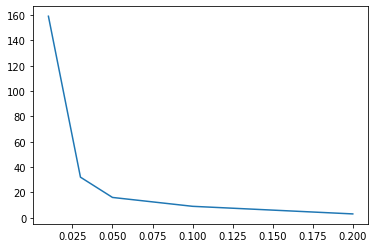

In [ ]:
plt.plot(supports, itemset_sizes)

In [ ]:
results = [fpgrowth(df, sup) for sup in supports]

In [ ]:
for result in results:
  result['itemset_sizes'] = result['itemsets'].apply(lambda x: len(x))

maxes = [result['itemset_sizes'].max() for result in results]

# Зависимость количества элементов в частом наборе от значения поддержки

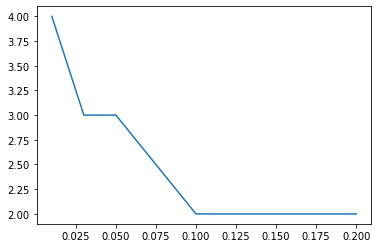

In [ ]:
plt.plot(supports, maxes)

# Зависимость количества частых наборов различной длины от значения поддержки

NameError: ignored

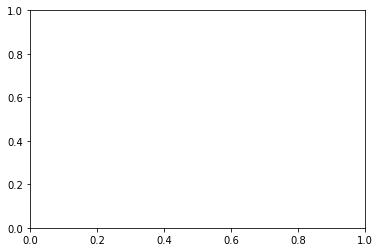

In [ ]:
fig2,ax2 = plt.subplots()

x = np.arange(len(supports))


def fill(arr):
  filled = [0,0,0,0]
  for i in range(len(arr)):
    filled[i] = arr[i]
  return filled

counts = [fill(res.groupby('itemset_sizes').count()['itemsets'].to_numpy()) for res in results]


ax2.bar(x - 0.3, [count[0] for count in counts], 0.2, label='1-itemset')
ax2.bar(x - 0.1, [count[1] for count in counts], 0.2, label='2-itemset')
ax2.bar(x + 0.1, [count[2] for count in counts], 0.2, label='3-itemset')
ax2.bar(x + 0.3, [count[3] for count in counts], 0.2, label='4-itemset')

ax2.set_xticks(x)
ax2.set_xticklabels(supports)
ax2.legend()


#Ассоциативные правила

In [64]:
dataset = data_gen('accidents.txt')
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = DataFrame(te_ary, columns=te.columns_)
df

,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,...,63,64,65,66,67,68,69,7,70,71,72,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99
0,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340178,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
340179,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
340180,True,False,False,False,Fa

In [65]:
itemsets = fpgrowth(df, min_support=0.4)

In [50]:
confidences = np.arange(0.99990, 0.99999, 0.00001)
# confidences = [0.99, 0.999, 0.9999, 0.99999]
confidences

array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [66]:
rule = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rule

KeyboardInterrupt: ignored

In [67]:
c_max = rule['consequents'].max()
a_max = rule['antecedents'].max()
total_max = max(len(c_max), len(a_max))
total_max

3

In [68]:
lengths = (rule['consequents'].map(len) +  + rule['antecedents'].map(len)).to_numpy()
(lengths > 7).sum() # counts num of lengths < 7

0

In [69]:
times = []
total_rules_count = []
max_objects_sizes = []
rules_count_len_less_than_7 = []

for conf in confidences:
  start = time.time()
  rules = association_rules(itemsets, metric='confidence', min_threshold=conf)
  end = time.time()

  times.append(end - start)
  total_rules_count.append(len(rules) - 1)

  c_max = rule['consequents'].max()
  a_max = rule['antecedents'].max()
  total_max = max(len(c_max), len(a_max))
  max_objects_sizes.append(total_max)

  lengths = (rule['consequents'].map(len) +  + rule['antecedents'].map(len)).to_numpy()
  rules_count_len_less_than_7.append((lengths < 5).sum()) # counts num of lengths < 7

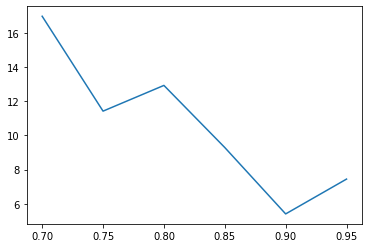

In [70]:
plt.plot(confidences, times)

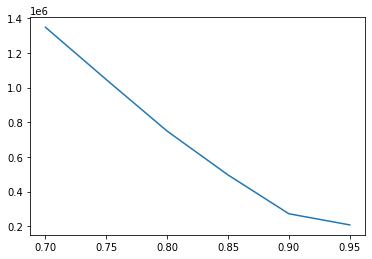

In [71]:
plt.plot(confidences, total_rules_count)

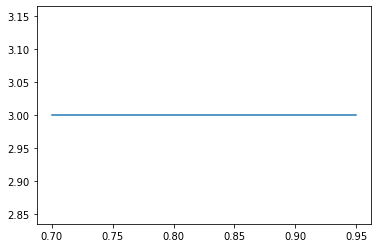

In [72]:
plt.plot(confidences, max_objects_sizes)

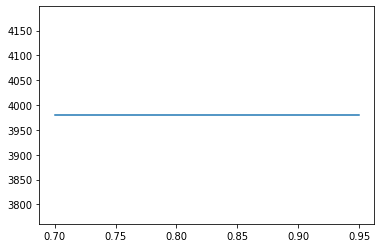

In [73]:
plt.plot(confidences, rules_count_len_less_than_7)